# Prediction of BMI based on Demographic Data
____
Tejas Pant <br>
07/06/2019

**Objective:** 
The objective of this study is to predict BMI index for individuals based on their demographic data. The dataset used for this study is the publicly available NHANES dataset.

Following steps were taken in the study:<br>
* Initial Exploration of Data
* Feature Selection and Feature Transformation
* Comparison of Performance of Machine Learning Models like:
    * Random Forest Regression
    * Linear Regression, Ridge Regression, Lasso Regression
    * k-Nearest Neighbor Regression
    * Multi-Layer Perceptron Regression

### Load all the required modules, APIs

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from scipy import stats
from scipy.stats import norm, skew

### Join Two Datasets

In [2]:
df = pd.read_csv('DEMO_I.csv')
df_bmi = pd.read_csv('BMX_I.csv')
print('Size of DEMO data:', len(df))
print('Size of BMX data:', len(df_bmi))
df_bmi_small = df_bmi[['SEQN','BMXBMI']]
df_comb = pd.merge(df_bmi_small, df, on='SEQN', how='inner')
df_comb.head()

Size of DEMO data: 9971
Size of BMX data: 9544


,SEQN,BMXBMI,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732,27.8,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,...,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39
1,83733,30.8,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,...,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32
2,83734,28.8,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,...,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.51
3,83735,42.4,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,...,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.00
4,83736,20.3,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,...,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.23


### Description of all the features in the data <br>
____
**SEQN** - Respondent sequence number. Unique number for each member <br>
**SDDSRVYR** - Data release cycle. Same for all the entries in table since data is for 2015-2016 <br>
**RIDSTATR** - Interview and examination status of the participant. Some members were only interviewed while others were examined too <br>
**RIAGENDR** - Gender of participant <br>
**RIDAGEYR** - Age in years at the time of screening <br>
**RIDAGEMN** - Age in months of the participant at the time of screening. Reported
for persons aged 24 months or younger at the time of exam <br>
**RIDRETH1** - Recode of reported race and Hispanic origin information <br>
**RIDRETH3** - Recode of reported race and Hispanic origin information, with NonHispanic Asian Category. Use this. <br>
**RIDEXMON** - Six month time period when the examination was performed two
categories: November 1 through April 30, May 1 through October 31. <br>
**RIDEXAGM** - Age in months of the participant at the time of examination.
Reported for persons aged 19 years or younger at the time of
examination <br>
**DMQMILIZ** - {Have you/Has SP} ever served on active duty in the U.S. Armed
Forces, military Reserves, or National Guard? (Active duty does not
include training for the Reserves or National Guard, but does include
activation, for service in the U.S. or in a foreign country, in support
of military or humanitarian operations.) <br>
**DMQADFC** - Did {you/SP} ever serve in a foreign country during a time of armed
conflict or on a humanitarian or peacekeeping
mission? (This would
include National Guard or reserve or active duty monitoring or
conducting peace keeping operations in Bosnia and Kosovo, in the
Sinai between Egypt and Israel, or in response to the 2004 tsunami
or Haiti in 2010.) <br>
**DMDBORN4** - In what country {were you/was SP} born? <br>
**DMDCITZN** - {Are you/Is SP} a citizen of the United States <br>
**DMDYRSUS** - Length of time the participant has been in the US <br>
**DMDEDUC3** - What is the highest grade or level of school {you have/SP has}
completed or the highest degree {you have/s/he has} received?. Only for people betweenn 6-19 years <br>
**DMDEDUC2** - What is the highest grade or level of school {you have/SP has}
completed or the highest degree {you have/s/he has} received?. For adults 20+ <br>
**DMDMARTL** - Marital Status <br>
**RIDEXPRG** - Pregnancy status for females between 20 and 44 years of age at the
time of MEC exam <br>
**SIALANG** - Language of the Sample Person Interview Instrument <br>
**SIAPROXY** - Was a Proxy respondent used in conducting the Sample Person (SP)
interview? <br>
**SIAINTRP** - Was an interpreter used to conduct the Sample Person (SP)
interview? <br>
**FIALANG** - Language of the Family Interview Instrument <br>
**FIAPROXY** - Was a Proxy respondent used in conducting the Family Interview? <br>
**FIAINTRP** - Was an interpreter used to conduct the Family interview <br>
**MIALANG** - Language of the MEC CAPI Interview Instrument <br>
**MIAPROXY** - Was a Proxy respondent used in conducting the MEC CAPI Interview? <br>
**MIAINTRP** - Was an interpreter used to conduct the MEC CAPI interview <br>
**AIALANGA** - Language of the MEC ACASI Interview Instrument <br>
**DMDHHSIZ** - Total number of people in the Household <br>
**DMDFMSIZ** - Total number of people in the Family <br>
**DMDHHSZA** - Number of children aged 5 years or younger in the household <br>
**DMDHHSZB** - Number of children aged 6-17
years old in the household <br>
**DMDHHSZE** - Number of adults aged 60 years or older in the household <br>
**DMDHRGND** - HH reference person's gender <br>
**DMDHRAGE** - HH reference person's age in years <br>
**DMDHRBR4** - HH reference person's country of birth <br>
**DMDHREDU** - HH reference person's education level <br>
**DMDHRMAR** - HH reference person's marital status <br>
**DMDHSEDU** - HH reference person's spouse's education level <br>
**WTINT2YR** - Full sample 2 year interview weight. <br>
**WTMEC2YR** - Full sample 2 year MEC exam weight. Not using this since it is 0 for people not examined <br>
**SDMVPSU** - Masked variance unit pseudoPSU
variable for variance estimation <br>
**SDMVSTRA** - Masked variance unit pseudostratum
variable for variance
estimation <br>
**INDHHIN2** - Total household income (reported as a range value in dollars) <br>
**INDFMIN2** - Total family income (reported as a range value in dollars) <br>
**INDFMPIR** - A ratio of family income to poverty guidelines. <br>





 ## Exploaration of Data and Feature Selection
 ____
 * In this section we initially explore the data to explore the features available for prediction of BMI
 * Box plots are made for some of the features to check for outliers
 * Histograms are made for the feature variables and the target variable BMI to see the shape of their distribution
 * We select feature variables that will be used for predicting the BMI using the different models
 * Features that have more than 50% missing values are outright rejected
 * Features which have redundant information are removed
 * Some of the features are removed after training a random forest regression model and looking at the feature importance plots

In [3]:
df_comb.isna().sum()

SEQN           0
BMXBMI       788
SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEYR       0
RIDAGEMN    8882
RIDRETH1       0
RIDRETH3       0
RIDEXMON       0
RIDEXAGM    5484
DMQMILIZ    3657
DMQADFC     9037
DMDBORN4       0
DMDCITZN       2
DMDYRSUS    7409
DMDEDUC3    6998
DMDEDUC2    4070
DMDMARTL    4070
RIDEXPRG    8304
SIALANG        0
SIAPROXY       1
SIAINTRP       0
FIALANG      267
FIAPROXY     267
FIAINTRP     267
MIALANG     2567
MIAPROXY    2566
MIAINTRP    2566
AIALANGA    3582
DMDHHSIZ       0
DMDFMSIZ       0
DMDHHSZA       0
DMDHHSZB       0
DMDHHSZE       0
DMDHRGND       0
DMDHRAGE       0
DMDHRBR4     341
DMDHREDU     341
DMDHRMAR      60
DMDHSEDU    4492
WTINT2YR       0
WTMEC2YR       0
SDMVPSU        0
SDMVSTRA       0
INDHHIN2     282
INDFMIN2     267
INDFMPIR     935
dtype: int64

In [3]:
def featureSelection(df):
    #dropping features with too many missing values
    df1 = df.drop(['RIDAGEMN','RIDEXMON','RIDEXAGM','DMQMILIZ','DMQADFC','DMDCITZN','DMDYRSUS','DMDMARTL','RIDEXPRG'],axis=1)
    df1 = df1.drop(['FIALANG','FIAPROXY','FIAINTRP','MIALANG','MIAPROXY','MIAINTRP','AIALANGA','DMDHSEDU'], axis=1)

    #dropping because same for all features or redundant information
    df1 = df1.drop(['SDDSRVYR','RIDRETH1', 'WTMEC2YR'],axis=1)#WTMEC2YR is zero for people not examined hence dropped.

    #droppping because irrelevant information
    df1 = df1.drop(['SIAPROXY','RIDSTATR','INDFMIN2'],axis=1) 

    #Check if all people above the age of 20 have some entry for education level
    assert (df1['RIDAGEYR'].loc[(df1['RIDAGEYR']>20) & (np.isfinite(df1['DMDEDUC2']))].count() == df1['RIDAGEYR'].loc[df1['RIDAGEYR']>20].count())

    #Check if there are any people who have entries for both 
    #if (np.isfinite(df1['DMDEDUC3']) & np.isfinite(df1['DMDEDUC2'])).sum() == 0:
    #    df1['DMDEDUC'] = df['DMDEDUC3'].combine_first(df['DMDEDUC2'])

    # Drop DMDEDUC3, DMDEDUC2 since we have combined them
    df1 = df1.drop(['DMDEDUC2','DMDEDUC3'],axis=1)
    df1 = df1[np.isfinite(df['INDHHIN2'])]
    df1 = df1[np.isfinite(df['INDFMPIR'])]
    df1 = df1[np.isfinite(df['DMDHRBR4'])] #all the entries that do not have HH country of birth do not have level of education
    df1 = df1[np.isfinite(df['DMDHRMAR'])]
    df1 = df1[np.isfinite(df['BMXBMI'])]
    df1 = df1.drop(['SIALANG', 'SIAINTRP'],axis=1)
    df1 = df1.drop(['WTINT2YR'],axis=1)
    df1 = df1.drop(['DMDFMSIZ','DMDHRGND','DMDHRBR4','DMDHHSZA','DMDHHSZE'],axis = 1) #dropping features based on RF importance
    df2 = df1.drop(['SEQN'],axis = 1)
    df2 = df2.drop(['SDMVPSU','SDMVSTRA'],axis=1)
    return df2

In [4]:
df2 = featureSelection(df_comb)
df2.columns

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Index(['BMXBMI', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DMDBORN4', 'DMDHHSIZ',
       'DMDHHSZB', 'DMDHRAGE', 'DMDHREDU', 'DMDHRMAR', 'INDHHIN2', 'INDFMPIR'],
      dtype='object')

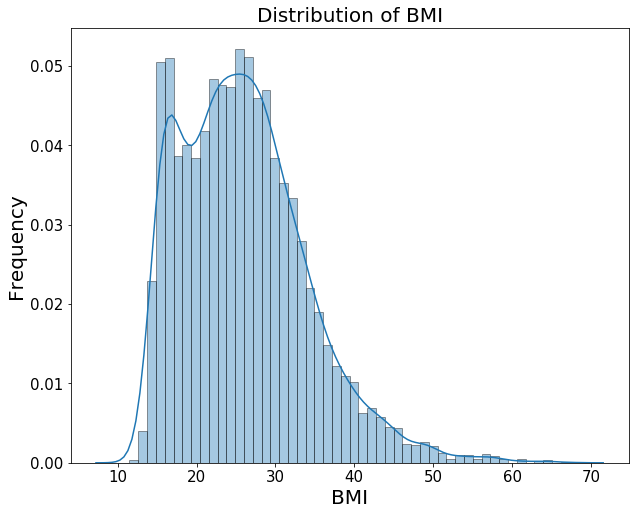

In [6]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df2['BMXBMI'], hist_kws=dict(edgecolor="k", linewidth=1));
plt.ylabel('Frequency',size=20)
plt.xlabel('BMI',size=20)
plt.title('Distribution of BMI',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show();

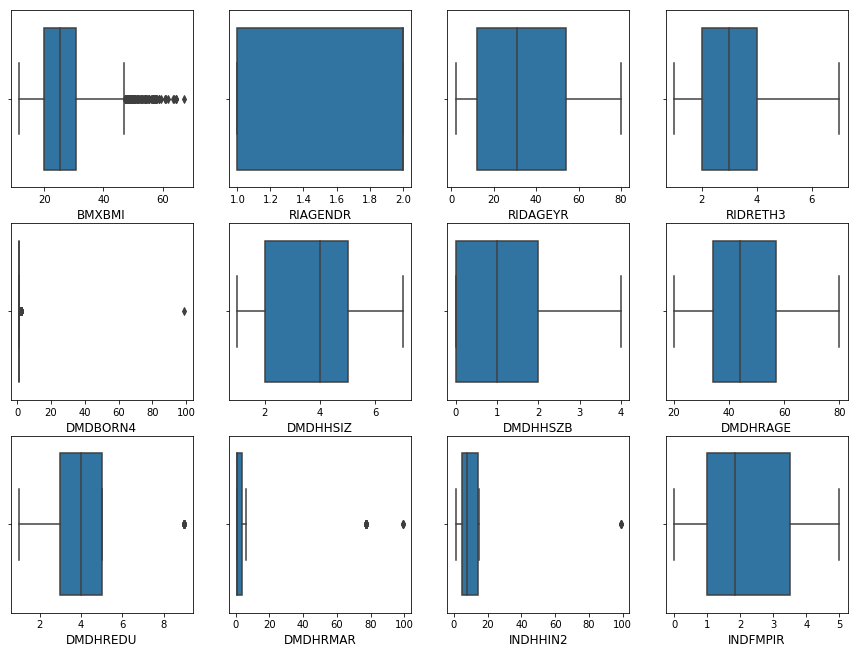

In [55]:
#Box plots for select features
plt.figure(figsize=(15,15))
fnum = 1
for i in df2.columns:
    plt.subplot(4,4,fnum)
    sns.boxplot(df2[i])
    plt.xlabel(i, size = 12)
    fnum += 1
plt.show()

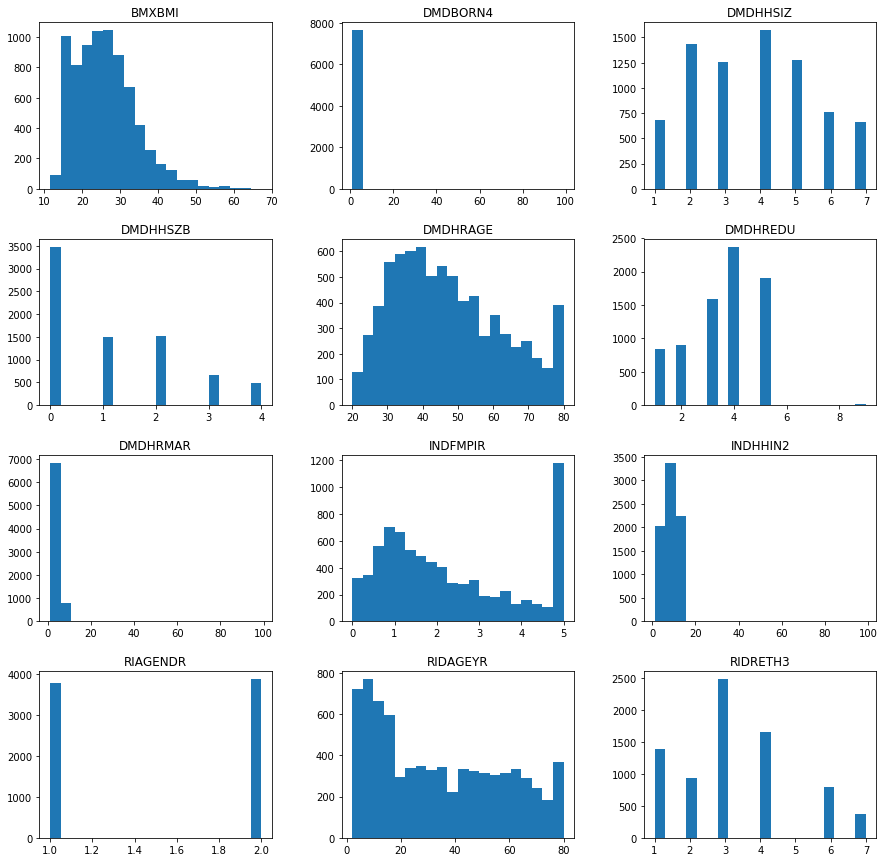

In [57]:
# Histogram plots for select features
hist = df2.hist(bins=20,figsize=(15,15),grid=False)

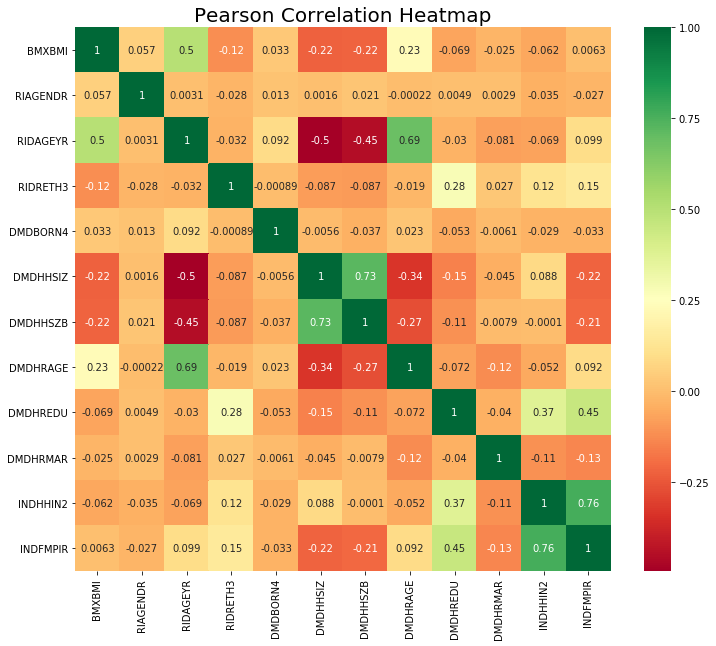

In [8]:
#Correlation Heatmap for selected features
plt.figure(figsize=(12, 10))
sns.heatmap(df2.corr(), annot=True, cmap="RdYlGn")
plt.title("Pearson Correlation Heatmap",size=20)
plt.show();

### Transformation of Features
____
* It is observed that some of the features have skewed distributions as can been seen from the histogram above
* In this study it is observed that the R2-score for the regression models improves when some of the feature variables and the target variable BMI are transformed using $log(1 + feature value)$ transformation so that the distributions are close to a normal distribution

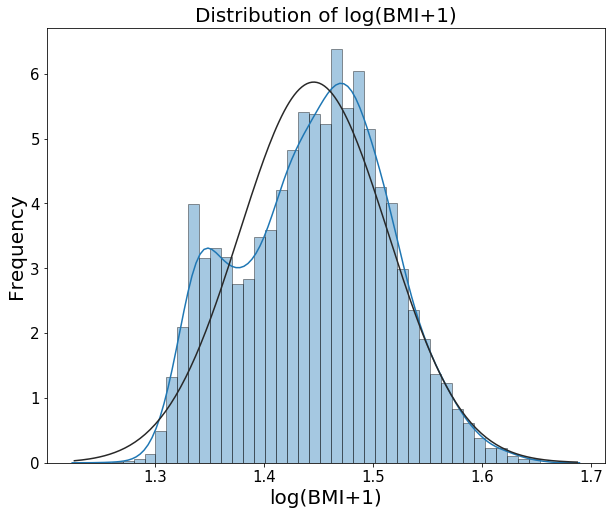

In [52]:
fig = plt.figure(figsize=(10,8))
sns.distplot(np.log1p(df2['BMXBMI']), hist_kws=dict(edgecolor="k", linewidth=1), fit=norm);
plt.ylabel('Frequency',size=20)
plt.xlabel('log(BMI+1)',size=20)
plt.title('Distribution of log(BMI+1)',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show();

In [10]:
#Transformation of some of the variables
df2['BMXBMI'] = np.log1p(df2['BMXBMI'])
df2['DMDHRAGE'] = np.log1p(df2['DMDHRAGE'])
df2['INDFMPIR'] = np.log1p(df2['INDFMPIR'])
df2['INDHHIN2'] = np.log1p(df2['INDHHIN2'])
df2['RIDAGEYR'] = np.log1p(df2['RIDAGEYR'])

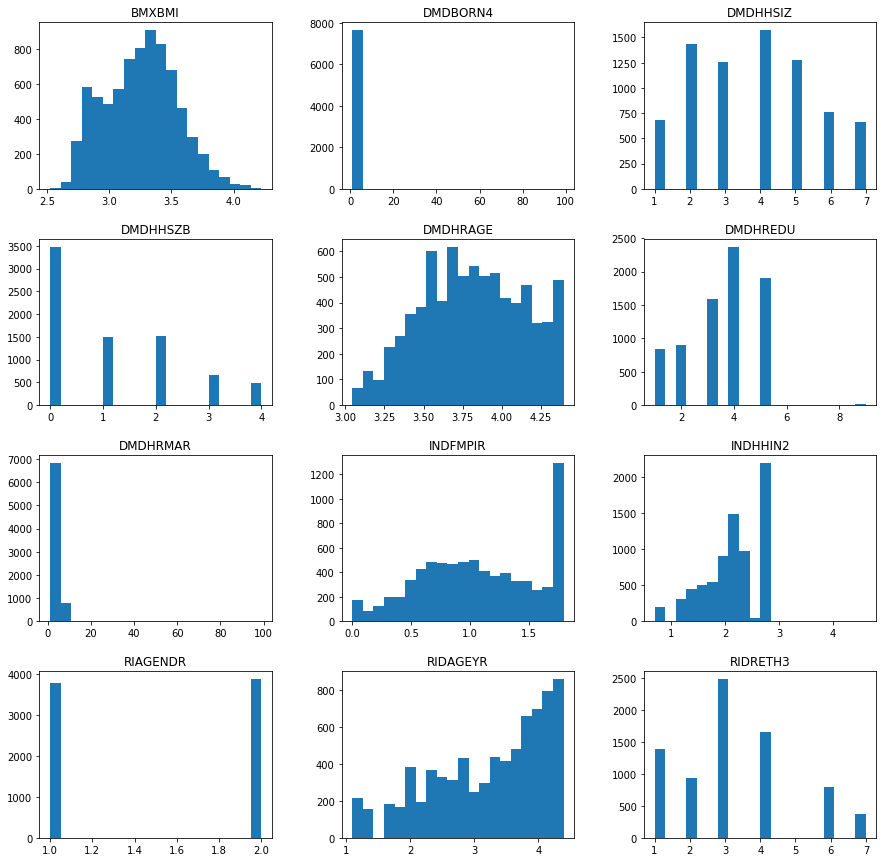

In [50]:
hist = df2.hist(bins=20,figsize=(15,15),grid=False)

## Split Data into Training Set and Test Set
____
* All the feature variables are normalized using $\frac{X - \mu}{\sigma}$
* We split the entire data set into 70% training set and 30% test set
* A validation set is not defined since the number of samples in the training set are less and we use grid search for all the regression models which uses k-fold cross-validation to identify the best parameters 


In [12]:
def splitDataset(df2):
    y_ = list(df2['BMXBMI'])
    df2 = df2.drop(['BMXBMI'],axis=1)
    Xmean = list(df2.mean())
    Xstd = list(df2.mean())
    df2norm = (df2 - df2.mean()) / df2.std()
    #df2norm = df2
    #df2norm.describe()
    #train, test, y__, y_test = train_test_split(df2norm, y_, test_size=0.2)
    #train, valid, y_train, y_valid = train_test_split(train, y__, test_size=0.25)

    train, test, y_train, y_test = train_test_split(df2norm, y_, test_size=0.3)

    print('Size of Training Set: ', len(train))
    #print('Size of Validation Set: ',len(valid))
    print('Size of Test Set: ',len(test))
    X_train = train.values.tolist()
    #X_valid = valid.values.tolist()
    X_test = test.values.tolist()
    assert len(X_train) == len(y_train)
    #assert len(X_valid) == len(y_valid)
    assert len(X_test) == len(y_test)
    return X_train, X_test, y_train, y_test, df2norm

In [40]:
X_train, X_test, y_train, y_test, df2norm = splitDataset(df2)
assert len(df2norm.columns) == len(X_train[0])

Size of Training Set:  5348
Size of Test Set:  2292


### Look at distribution of Test Set

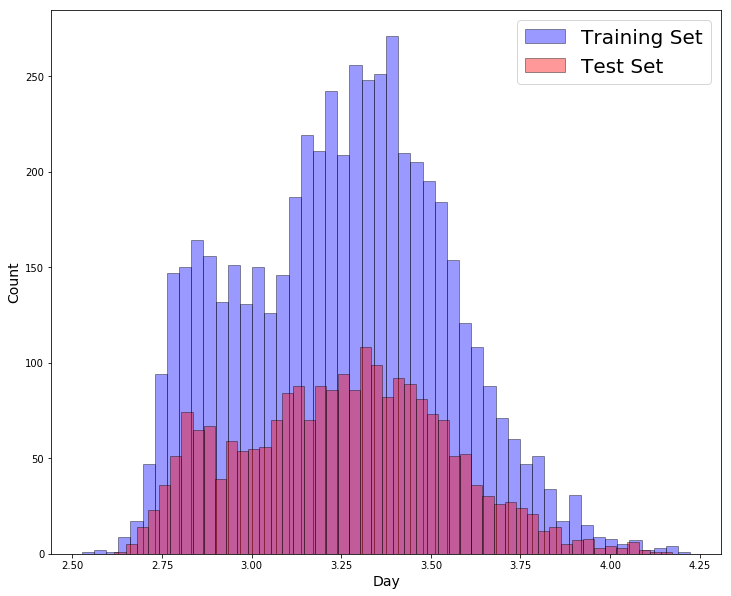

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.distplot(y_train, color="blue", hist_kws=dict(edgecolor="k", linewidth=1), hist=True, bins=50, kde = False, label="Training Set")
sns.distplot(y_test, color="red", hist_kws=dict(edgecolor="k", linewidth=1), hist=True, bins=50, kde = False, label="Test Set")
#ax.set_title('Distribution of Day of Year on which Driver Came Onboard \n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Day', size = 14)
plt.legend(loc=1, prop={'size': 20})
plt.show()

## Training different ML models

### Random Forest Model

In [15]:
def RFRGridSearch():
    rfr = RandomForestRegressor(random_state=0)
    param_grid = { 'n_estimators': [100, 200, 400, 800], 'max_depth' : [2,4,8,16,20]}
    CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)
    CV_rfr.fit(X_train, y_train)
    return CV_rfr.best_params_

def RFRegression(best_params):
    rfr = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],random_state=0)
    rfr.fit(X_train, y_train)
    ypred_train = rfr.predict(X_train)
    ypred_test = rfr.predict(X_test)
    acc_train = mean_squared_error(y_train, ypred_train)
    acc_test = mean_squared_error(y_test, ypred_test)
    print("Train MSE : ", acc_train)
    print("Test MSE : ", acc_test)
    print("Train R2 Score:", r2_score(y_train,ypred_train))
    print("Test R2 Score:", r2_score(y_test,ypred_test))
    feat_imp = rfr.feature_importances_
    return acc_train, acc_test, feat_imp, rfr

In [21]:
%%time
#Carry out a grid search 
#rfr_best_params = RFRGridSearch()
rfc_best_params = dict({'max_depth': 8, 'n_estimators': 800}) #this was obtained from the Grid search
rfc_train, rfc_test, rf_feat_imp, rfreg = RFRegression(rfc_best_params)

Train MSE :  0.03019766747373554
Test MSE :  0.039429837547098605
Train R2 Score: 0.6357596033858286
Test R2 Score: 0.5323122664370513
Wall time: 6.19 s


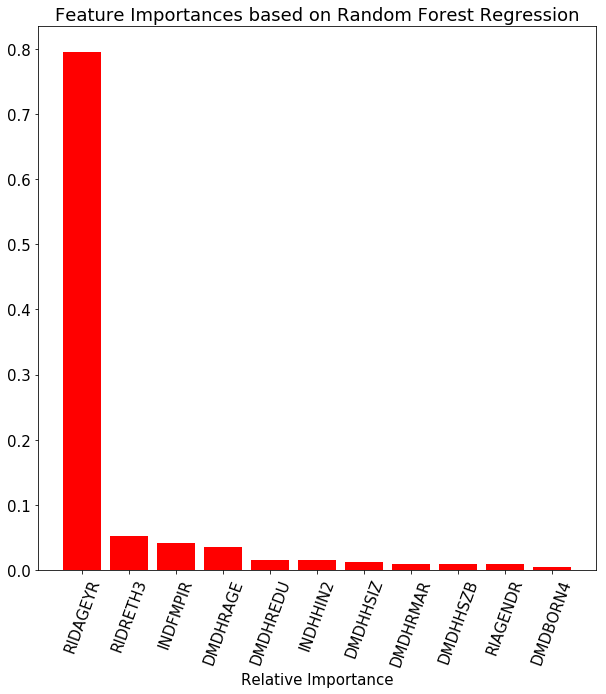

In [22]:
features=list(df2norm.columns)
importances = rf_feat_imp
indices = np.argsort(-importances)
featname_sort = [features[i] for i in indices]

plt.figure(figsize=(10,10))
plt.title('Feature Importances based on Random Forest Regression',size = 18)
plt.bar(range(len(indices)), importances[indices], color='r', align='center')
plt.xticks(range(len(indices)), featname_sort, rotation =70, size = 15)
plt.yticks(size = 15)
plt.xlabel('Relative Importance',size = 15)
plt.show()

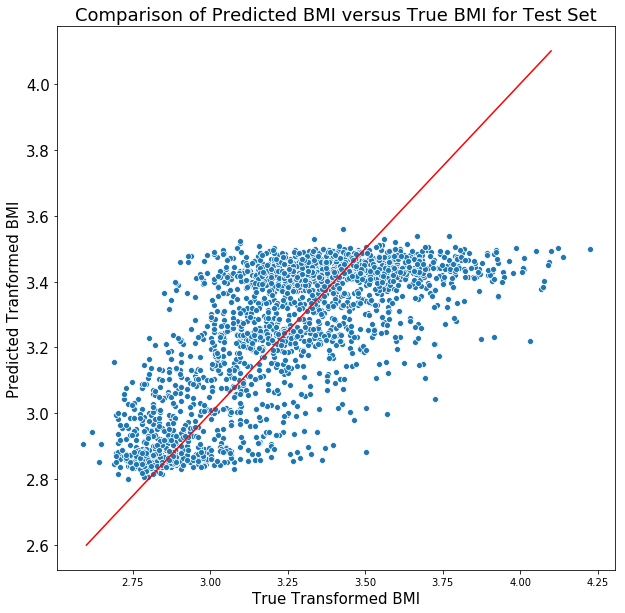

In [23]:
plt.figure(figsize=(10,10))
plt.title('Comparison of Predicted BMI versus True BMI for Test Set',size = 18)
sns.scatterplot(y_test,rfreg.predict(X_test))
plt.plot(np.arange(2.6,4.2,0.1),np.arange(2.6,4.2,0.1),'r')
plt.yticks(size = 15)
plt.xlabel('True Transformed BMI',size = 15)
plt.ylabel('Predicted Tranformed BMI',size = 15)
plt.show()

### Linear Regression

In [24]:
def LinearRegression():
    linreg = linear_model.LinearRegression()
    linreg.fit(X_train, y_train) 
    ypred_train = linreg.predict(X_train)
    ypred_test = linreg.predict(X_test)
    acc_train = mean_squared_error(y_train, ypred_train)
    acc_test = mean_squared_error(y_test, ypred_test)
    print("Train MSE : ", acc_train)
    print("Test MSE : ", acc_test)
    print("Train R2 Score:", r2_score(y_train,ypred_train))
    print("Test R2 Score:", r2_score(y_test,ypred_test))
    return acc_train, acc_test, linreg

def RidgeRegression(param):
    ridreg = linear_model.Ridge(alpha=param['alpha'])
    ridreg.fit(X_train, y_train) 
    ypred_train = ridreg.predict(X_train)
    ypred_test = ridreg.predict(X_test)
    acc_train = mean_squared_error(y_train, ypred_train)
    acc_test = mean_squared_error(y_test, ypred_test)
    print("Train MSE : ", acc_train)
    print("Test MSE : ", acc_test)
    print("Train R2 Score:", r2_score(y_train,ypred_train))
    print("Test R2 Score:", r2_score(y_test,ypred_test))
    return acc_train, acc_test, ridreg

def LassoRegression(param):
    lasreg = linear_model.Lasso(alpha=param['alpha'])
    lasreg.fit(X_train, y_train) 
    ypred_train = lasreg.predict(X_train)
    ypred_test = lasreg.predict(X_test)
    acc_train = mean_squared_error(y_train, ypred_train)
    acc_test = mean_squared_error(y_test, ypred_test)
    print("Train MSE : ", acc_train)
    print("Test MSE : ", acc_test)
    print("Train R2 Score:", r2_score(y_train,ypred_train))
    print("Test R2 Score:", r2_score(y_test,ypred_test))
    return acc_train, acc_test, lasreg

In [48]:
%%time
print('Linear Regression Results')
print("")
linreg_train, linreg_test, linreg = LinearRegression()
print("")
print("")
print('Ridge Regression Results')
print("")
ridge_param = dict({'alpha': 10})
ridreg_train, ridreg_test, ridreg = RidgeRegression(ridge_param)
print("")
print("")
print('Lasso Regression Results')
print("")
lasso_param = dict({'alpha': 0.01})
lasreg_train, lasreg_test, lasreg = LassoRegression(lasso_param)
print("")
print("")

Linear Regression Results

Train MSE :  0.0443677769108889
Test MSE :  0.04473754351573359
Train R2 Score: 0.4696864375375205
Test R2 Score: 0.458724517749193


Ridge Regression Results

Train MSE :  0.04436811255248406
Test MSE :  0.044733355853713734
Train R2 Score: 0.4696824257230363
Test R2 Score: 0.45877518389223904


Lasso Regression Results

Train MSE :  0.04527088955638697
Test MSE :  0.045500410924195246
Train R2 Score: 0.45889182672569373
Test R2 Score: 0.4494946541501045


Wall time: 78.7 ms


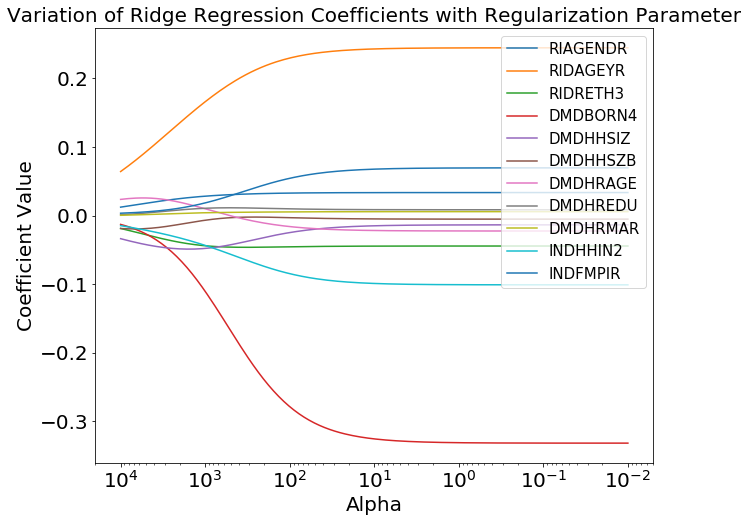

In [27]:
#Effect of regularization parameter on Ridge regression model coefficients
n_alphas = 200
alphas = np.logspace(4, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10,8))
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Alpha', size=20)
plt.ylabel('Coefficient Value', size = 20)
plt.title('Variation of Ridge Regression Coefficients with Regularization Parameter', size=20)
plt.axis('tight')
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(list(df2norm.columns),loc=1,prop={'size': 15})
plt.show()

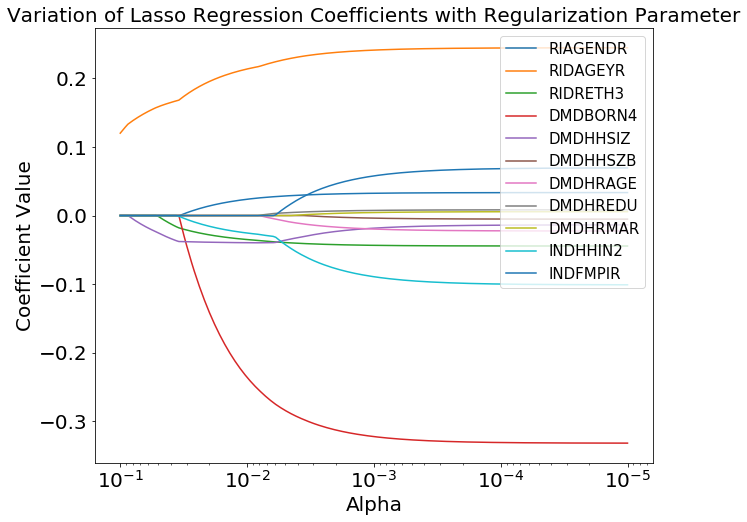

In [28]:
#Effect of regularization parameter on Lasso regression model coefficients
n_alphas = 200
alphas = np.logspace(-1, -5, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Lasso(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10,8))
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Alpha', size=20)
plt.ylabel('Coefficient Value', size = 20)
plt.title('Variation of Lasso Regression Coefficients with Regularization Parameter', size=20)
plt.axis('tight')
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(list(df2norm.columns),loc=1,prop={'size': 15})
plt.show()

### Nearest Neighbor Regression

In [29]:
def kNNRegression(nneigh):
    knn = KNeighborsRegressor(n_neighbors=nneigh)
    knn.fit(X_train, y_train) 
    ypred_train = knn.predict(X_train)
    ypred_test = knn.predict(X_test)
    acc_train = mean_squared_error(y_train, ypred_train)
    acc_test = mean_squared_error(y_test, ypred_test)
    print("Train MSE : ", acc_train)
    print("Test MSE : ", acc_test)
    print("Train R2 Score:", r2_score(y_train,ypred_train))
    print("Test R2 Score:", r2_score(y_test,ypred_test))
    return acc_train, acc_test, knn

In [42]:
%%time
num_neighbors = 10
knnreg_train, knnreg_test, knnreg = kNNRegression(num_neighbors)

Train MSE :  0.0356833331761904
Test MSE :  0.04412657816781737
Train R2 Score: 0.5734887602052272
Test R2 Score: 0.4661165320920363
Wall time: 1.71 s


### MLP Regressor

In [38]:
def MultiLayerPerpRegressor():
    mlp = MLPRegressor(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(20), random_state=0)
    mlp.fit(X_train, y_train) 
    ypred_train = mlp.predict(X_train)
    ypred_test = mlp.predict(X_test)
    acc_train = mean_squared_error(y_train, ypred_train)
    acc_test = mean_squared_error(y_test, ypred_test)
    print("Train MSE : ", acc_train)
    print("Test MSE : ", acc_test)
    print("Train R2 Score:", r2_score(y_train,ypred_train))
    print("Test R2 Score:", r2_score(y_test,ypred_test))
    return acc_train, acc_test, mlp

In [41]:
%%time
mlp_train, mlp_test, mlpreg = MultiLayerPerpRegressor()

Train MSE :  0.03747342038100827
Test MSE :  0.03925616401039514
Train R2 Score: 0.5520924318606245
Test R2 Score: 0.5250432313394535
Wall time: 1.73 s


## Conclusions
___
* Predicted R2-Score for Different Models:

| Machine Learning Model 	| R2-Score 	| Computational Cost |
|------------------------	|----------	| ----------
| Random Forest          	| 0.54     	| 6.2 s |
| Ridge                  	| 0.47     	| 67.8 ms |
| k-Nearest Neighbor     	| 0.46     	| 1.71 s |
| Multi-Layer Perceptron 	| 0.52     	| 1.73 s |

* From the table it can be observed that the **Random-Forest Regression model** performs slightly better in comparison to the other models <br>

* Looking at the feature importance values from the random forest model it is observed that the features from the demographic data which signficantly affect the prediction of BMI are **participant age, ethnicity, income to poverty ratio**

* The R2-score for all the machine learning models lies in the range 0.45 - 0.55 which indicates relatively poor performance of all the models. Transforming some of the feature variables and the BMI variable using the **log(1+x) transformation** to make their distributions close to a normal distribution improved the performance of all the models by around 25%

* The primary reason for the low R2-score of all the models is that BMI depends on physical characteristics of the participant such as height, weight, body dimensions, age etc. The only physical characteristics which is directly available in the demographic data is age and accordingly it has highest feature value importance in the random forest model



## Recommendations
___

* It is expected that the performance of the machine learning models in predicting the BMI can be improved significantly by incorporating feature variables describing the physical attributes of an individual since they are directly correlated with the BMI